In [1]:
%matplotlib notebook
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns  # data visualization library  
import matplotlib.pyplot as plt

In [ ]:
order_dss = pd.read_csv("orders_distance_stores_softmax.csv")
print(order_dss.shape)
order_dss.head()

(136026, 10)


,Unnamed: 0,user_id,store_id,distance,order_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,0,210,0,2.304404,1438665,prior,9,1,18,3.0
1,1,210,0,2.304404,2850206,prior,36,0,7,2.0
2,2,210,0,2.304404,2406913,prior,42,0,8,3.0
3,3,210,0,2.304404,1155933,prior,43,2,23,2.0
4,4,210,0,2.304404,271697,prior,56,5,17,3.0


In [ ]:
order_pps = pd.read_csv("order_products__prior_specials.csv")
print(order_pps.shape)
order_pps.head()

(1172312, 6)


,Unnamed: 0,order_id,product_id,add_to_cart_order,reordered,special
0,0,15,19660,1,1,15
1,1,15,21195,2,1,0
2,2,15,7461,3,1,50
3,3,15,2996,4,1,0
4,4,15,32463,5,1,0


In [ ]:
df_merge = pd.merge(order_pps,order_dss, on='order_id')
print(df_merge.shape)
df_merge.head()

(1172312, 15)


,Unnamed: 0_x,order_id,product_id,add_to_cart_order,reordered,special,Unnamed: 0_y,user_id,store_id,distance,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,0,15,19660,1,1,15,37332,54901,1,0.304608,prior,51,3,11,2.0
1,1,15,21195,2,1,0,37332,54901,1,0.304608,prior,51,3,11,2.0
2,2,15,7461,3,1,50,37332,54901,1,0.304608,prior,51,3,11,2.0
3,3,15,2996,4,1,0,37332,54901,1,0.304608,prior,51,3,11,2.0
4,4,15,32463,5,1,0,37332,54901,1,0.304608,prior,51,3,11,2.0


In [ ]:
df_merge.isna().sum()

Unnamed: 0_x                  0
order_id                      0
product_id                    0
add_to_cart_order             0
reordered                     0
special                       0
Unnamed: 0_y                  0
user_id                       0
store_id                      0
distance                      0
eval_set                      0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    13871
dtype: int64

In [ ]:
df_merge.to_csv('df_merge.csv')

## Drop any rows that contain any null values
because the proportion of missing values are insignificant. 13817/1172312 = 1.18%

In [ ]:
# to drop any rows that contain any null values
df_merge.dropna(inplace=True)
df_merge.shape

(1158441, 15)

In [ ]:
df_merge.isna().sum()

Unnamed: 0_x              0
order_id                  0
product_id                0
add_to_cart_order         0
reordered                 0
special                   0
Unnamed: 0_y              0
user_id                   0
store_id                  0
distance                  0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

## Drop duplicated rows

In [ ]:
df_merge.drop_duplicates(keep='first',inplace=True)
df_merge.shape

(1158441, 15)

## Drop the column of index

In [ ]:
df_merge.drop(['Unnamed: 0_x','Unnamed: 0_y'],axis=1, inplace=True)
df_merge.shape

(1158441, 13)

## Convert categories to numbers

In [ ]:
df_merge.dtypes

order_id                    int64
product_id                  int64
add_to_cart_order           int64
reordered                   int64
special                     int64
user_id                     int64
store_id                    int64
distance                  float64
eval_set                   object
order_number                int64
order_dow                   int64
order_hour_of_day           int64
days_since_prior_order    float64
dtype: object

In [ ]:
df_merge['eval_set']= df_merge['eval_set'].astype('category')
df_merge['eval_set']= df_merge['eval_set'].cat.codes + 1
df_merge.head()

,order_id,product_id,add_to_cart_order,reordered,special,user_id,store_id,distance,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,15,19660,1,1,15,54901,1,0.304608,1,51,3,11,2.0
1,15,21195,2,1,0,54901,1,0.304608,1,51,3,11,2.0
2,15,7461,3,1,50,54901,1,0.304608,1,51,3,11,2.0
3,15,2996,4,1,0,54901,1,0.304608,1,51,3,11,2.0
4,15,32463,5,1,0,54901,1,0.304608,1,51,3,11,2.0


In [ ]:
df_merge['eval_set'].unique()

array([1], dtype=int8)

### since column "eval_set" only have one unique value, we can also drop this value

In [ ]:
df_merge.drop(['eval_set'],axis = 1, inplace = True)
df_merge.shape

(1158441, 12)

In [ ]:
df_merge.to_csv('df_merge.csv', index=False)

# **Data Reduction**

## Remove items that have a low probability of being purchased

In [2]:
data = pd.read_csv("df_merge.csv")

**Step1: Check the percentage of each product**

In [3]:
((data['product_id'].value_counts()) / len(data) * 100).sort_values()

2049     0.000086
31798    0.000086
29751    0.000086
3128     0.000086
36904    0.000086
           ...   
21903    0.817910
47209    0.910793
21137    1.119349
24852    1.404474
13176    1.509442
Name: product_id, Length: 24783, dtype: float64

In [4]:
count_product = (data['product_id'].value_counts()).sort_values()
count_product

2049         1
31798        1
29751        1
3128         1
36904        1
         ...  
21903     9475
47209    10551
21137    12967
24852    16270
13176    17486
Name: product_id, Length: 24783, dtype: int64

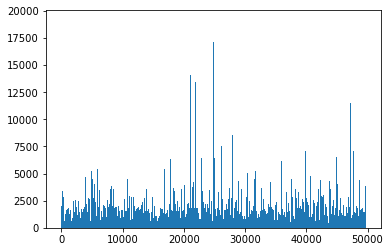

In [5]:
%matplotlib inline
plt.hist(data['product_id'],bins=500)
plt.show()

In [6]:
df_countProd = count_product.to_frame()
df_countProd.head()

,product_id
2049,1
31798,1
29751,1
3128,1
36904,1


**Stepe2: check the number of orders**

In [9]:
number_order = len(data['order_id'].unique())
number_order

134652

In [12]:
number_order*0.01

1346.52

A small probability event refers to an event with a very small probability of occurrence, which is generally not greater than 0.05 or 0.01. In statistics, a small probability event is considered to be an event that cannot actually occur in an experiment. 

Therefore, if an items is purchased less than 1346 times, we can say that it is a small probability event that the item will be purchased.

**Step3: Delete items purchased less than 1364 times**

In [13]:
dele_list = df_countProd.loc[df_countProd['product_id']<1346].index.to_list()
print(dele_list[:10])
len(dele_list)

[2049, 31798, 29751, 3128, 36904, 9150, 43492, 34855, 34730, 40994]


24693

In [14]:
data = data[~data['product_id'].isin(dele_list)]
data.head()

,order_id,product_id,add_to_cart_order,reordered,special,user_id,store_id,distance,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,15,19660,1,1,15,54901,1,0.304608,51,3,11,2.0
12,79,4210,1,1,0,197745,2,0.851075,94,6,15,3.0
23,95,22035,4,1,0,187742,5,2.190870,39,5,7,5.0
25,95,39928,6,1,30,187742,5,2.190870,39,5,7,5.0
27,95,21137,8,1,0,187742,5,2.190870,39,5,7,5.0


In [15]:
#check
(data['product_id'].value_counts()).sort_values()

28199     1347
34969     1348
36011     1367
38689     1371
35221     1375
         ...  
21903     9475
47209    10551
21137    12967
24852    16270
13176    17486
Name: product_id, Length: 90, dtype: int64

In [16]:
data.shape

(291882, 12)

## Delete users who have made too few purchases

In [47]:
df_user = data.groupby("user_id")['order_id'].nunique().to_frame()
df_user

,order_id
user_id,
210,96
310,8
313,81
690,64
786,91
...,...
205483,78
205543,77
205878,92


<AxesSubplot:xlabel='user_id', ylabel='order_id'>

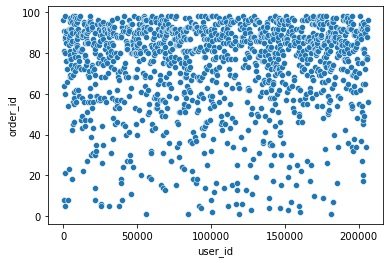

In [49]:
import seaborn as sns

sns.scatterplot(data=df_user, x="user_id", y="order_id")

In [51]:
df_user.describe()

,order_id
count,1367.000000
mean,73.010973
std,22.583128
min,1.000000
25%,62.000000
50%,80.000000
75%,90.000000
max,98.000000


Box plots are a graphical depiction of numerical data through their quantiles. It is a very simple but effective way to visualize outliers. Think about the lower and upper whiskers as the boundaries of the data distribution. Any data points that show above or below the whiskers, can be considered outliers or anomalous.

<AxesSubplot:>

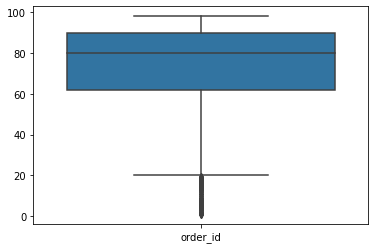

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df_user)

**Therefore, we will delete the data of users with less than 20 purchases**

In [54]:
dele_list = df_user.loc[df_user['order_id']<=20].index.to_list()
print(dele_list[:10])
len(dele_list)

[310, 1024, 3377, 5932, 21288, 21777, 25416, 25422, 30686, 37563]


64

In [55]:
data = data[~data['user_id'].isin(dele_list)]
data.head()

,order_id,product_id,add_to_cart_order,reordered,special,user_id,store_id,distance,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,15,19660,1,1,15,54901,1,0.304608,51,3,11,2.0
12,79,4210,1,1,0,197745,2,0.851075,94,6,15,3.0
23,95,22035,4,1,0,187742,5,2.190870,39,5,7,5.0
25,95,39928,6,1,30,187742,5,2.190870,39,5,7,5.0
27,95,21137,8,1,0,187742,5,2.190870,39,5,7,5.0


In [56]:
data.shape

(291073, 12)

## Stratified Sampling
Stratified Sampling is a sampling technique used to obtain samples that best represent the population. It reduces bias in selecting samples by dividing the population into homogeneous subgroups called strata, and randomly sampling data from each stratum(singular form of strata). 

## Outliers Detection

### Visualization--------PCA

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [19]:
# Before applying PCA, each feature should be centered (zero mean) and with unit variance
data_normalized = StandardScaler().fit(data).transform(data)  

pca3 = PCA(n_components = 3).fit(data_normalized)

data_pca3 = pca3.transform(data_normalized)

print(data.shape, data_pca3.shape)

(291882, 12) (291882, 3)


## Plotting the PCA-transformed version of the dataset

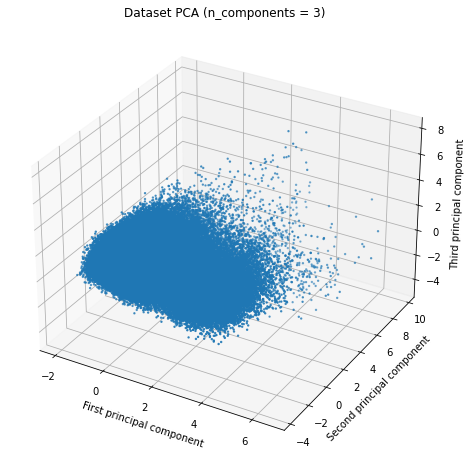

In [20]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_pca3[:,0],data_pca3[:,1],data_pca3[:,2],s=2)
ax.set_xlabel('First principal component')
ax.set_ylabel('Second principal component')
ax.set_zlabel('Third principal component')
plt.title('Dataset PCA (n_components = 3)')
plt.savefig("PCA")

### (1) Generalized Extreme Studentized Deviate (GESD) Test
GESD method has proved to be computationally efficient.
However, it assumes that the data follow a normal distribution

#### Normality Tests ------ Visual Normality Checks

In [22]:
pca1 = PCA(n_components = 1).fit(data_normalized)

data_pca1 = pca1.transform(data_normalized)

print(data.shape, data_pca1.shape)

(291882, 12) (291882, 1)


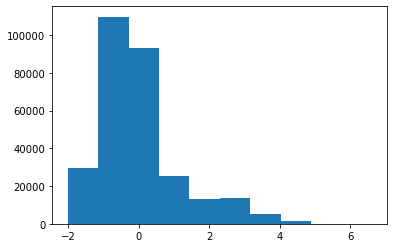

In [23]:
plt.hist(data_pca1)
plt.show()

In [24]:
list(data.columns)

['order_id',
 'product_id',
 'add_to_cart_order',
 'reordered',
 'special',
 'user_id',
 'store_id',
 'distance',
 'order_number',
 'order_dow',
 'order_hour_of_day',
 'days_since_prior_order']

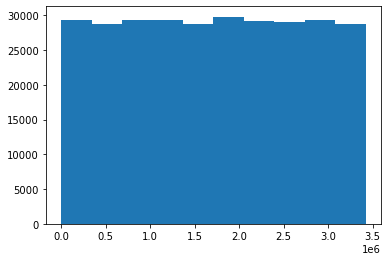

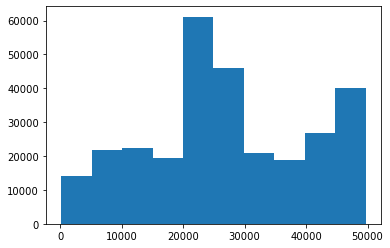

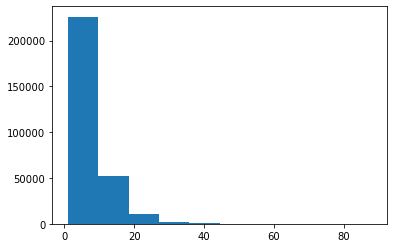

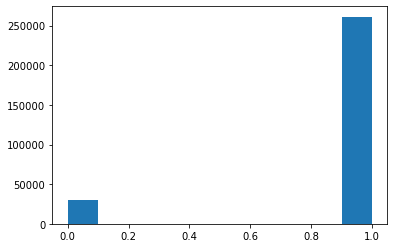

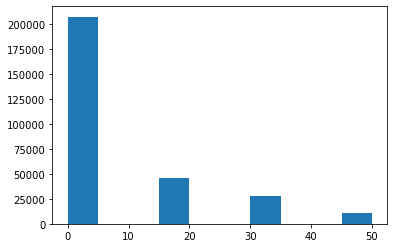

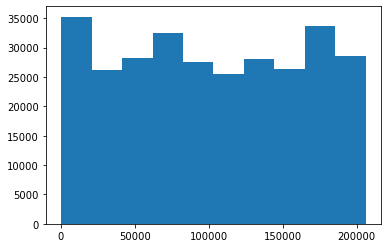

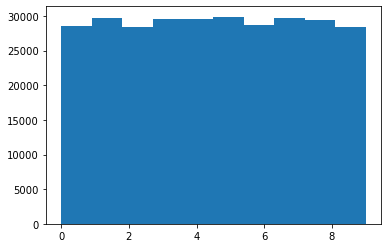

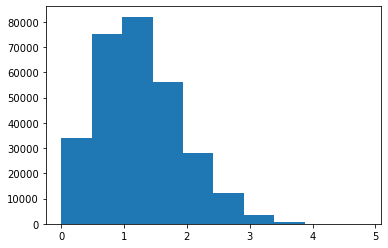

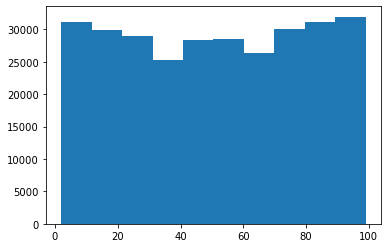

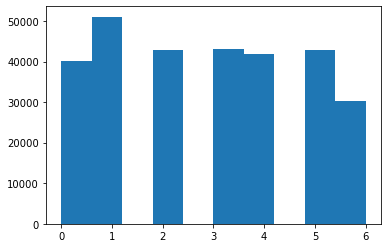

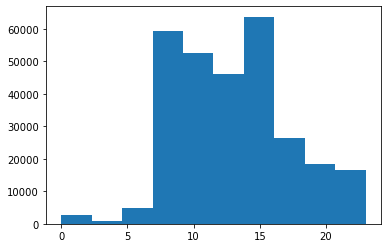

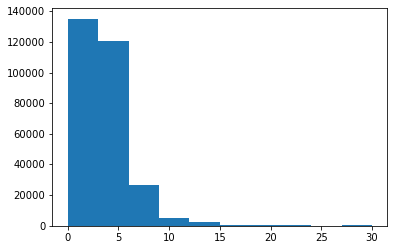

In [26]:
for col in list(data.columns):
    plt.hist(data[col])
    plt.show()

#### Since Sample does not look Gaussian, we can not use GESD method for outlier detection.

## (2) DBSCAN clustering
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

In [5]:
from sklearn.cluster import DBSCAN

In [ ]:
dbscan = DBSCAN(eps =50, min_samples = 50)

cls_findOutlier = dbscan.fit_predict(data_normalized)

print("Cluster membership values:\n{}".format(cls_findOutlier))

In [ ]:
unique, counts = np.unique(cls_findOutlier, return_counts=True)
dict(zip(unique, counts))

#### This method is sensitive to parameter settings
#### "The kernel for /preprocessing.ipynb appears to have died. It will restart automatically."
"Your session crashed after using all available RAM. "




## (3)Isolation Forest

In [ ]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest( behaviour = 'new', max_samples=100, random_state = 1, contamination= 'auto')
preds = clf.fit_predict(data_normalized)
preds

TypeError: __init__() got an unexpected keyword argument 'behaviour'

## (4) Robust Random Cut Forest